In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA


In [2]:
y = np.load('MNIST-labels.npy')
X = np.load('MNIST-images.npy')
X_train,X_test_val,y_train,y_test_val = train_test_split(X, y, test_size=0.3, random_state = 42)
X_test,X_val,y_test,y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state = 42)

Exploring X

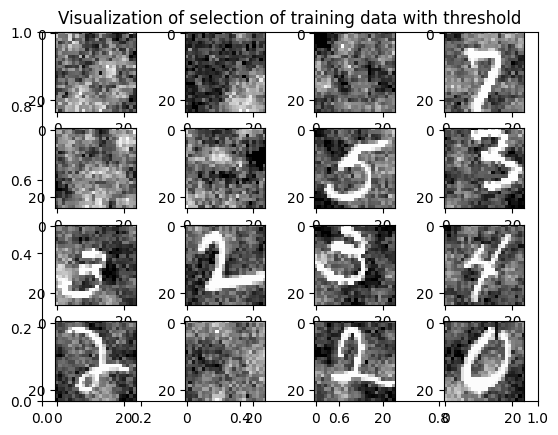

In [3]:
fig = plt.figure()
plt.title('Visualization of selection of training data with threshold')
amount = 16
square = math.ceil(math.sqrt(amount))
for i in range(amount):
    fig.add_subplot(square, square, i+1)
    plt.imshow(X_train[i], cmap='gray')

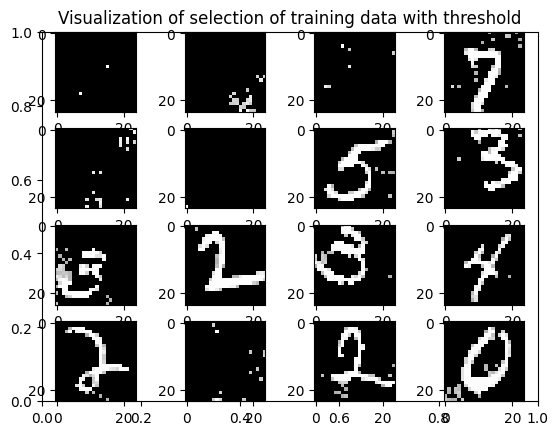

In [4]:
threshold = 175
X_train_reduced = np.where(X_train<threshold,0,X_train)

fig = plt.figure()
plt.title('Visualization of selection of training data with threshold')
amount = 16
square = math.ceil(math.sqrt(amount))
for i in range(amount):
    fig.add_subplot(square, square, i+1)
    plt.imshow(X_train_reduced[i], cmap='gray')

PCA:

In [5]:
# We need to center the data before doing pca
X_train_pca = X_train_reduced
center_function = lambda x: x - x.mean()
X= X.reshape(X.shape[0], 576) #transform to vector
X = center_function(X)

X_reduced_pca = np.where(X<0,0,X)
pca_x = PCA()
pca_x.fit(X)
pca_x_threshold = PCA()
pca_x_threshold.fit(X_reduced_pca)


PCA()

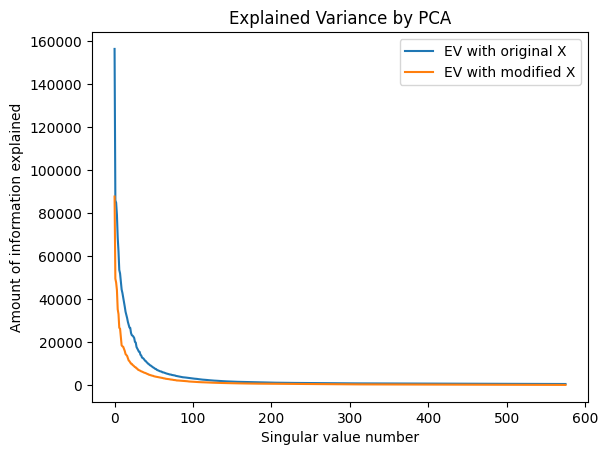

In [6]:
plt.plot(pca_x.explained_variance_, label = 'EV with original X')
plt.plot(pca_x_threshold.explained_variance_, label = f'EV with x : X < {threshold} = 0')
plt.legend()
plt.xlabel("Singular value number")
plt.ylabel("Amount of information explained")
plt.title("Explained Variance by PCA")
plt.show()

Resampling:

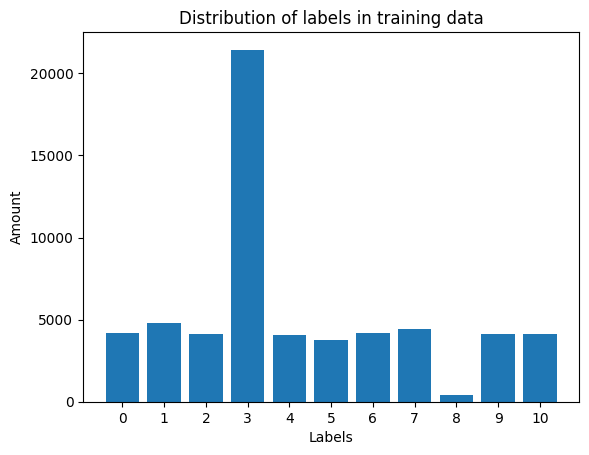

In [7]:
def plot_label_dist(y):
    rg = np.arange(0,11)
    labels = pd.DataFrame(y).value_counts().sort_index().values
    fig = plt.figure()
    plt.xticks(rg)
    plt.bar(rg,labels) # Using bar because histogram combined columns 9 and 10
    plt.title('Distribution of labels in training data')
    plt.xlabel('Labels')
    plt.ylabel('Amount')
    plt.show()
plot_label_dist(y_train)

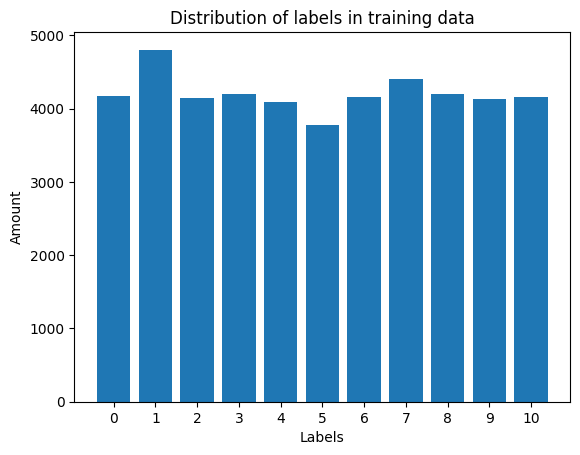

In [8]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
X_majority = X_train[(y_train==3)] 
X_minority = X_train[(y_train==8)] 

X_remaining = X_train[(y_train!=3)]
y_remaining = y_train[(y_train!=3)]

X_remaining = X_remaining[(y_remaining!=8)]
y_remaining = y_remaining[(y_remaining!=8)]

average_amount = len(y_remaining)//9 # We create this so we can resample to the average amount of occorences of labels
X_minority_upsampled = resample(X_minority, replace=True, n_samples= average_amount, random_state=42) 
X_majority_downsampled = resample(X_majority, replace=True, n_samples= average_amount, random_state=42) 


y_majority_downsampled = np.full(X_majority_downsampled.shape[0],3,dtype='int64')
y_minority_upsampled = np.full(X_minority_upsampled.shape[0],8,dtype='int64')

X_train= np.concatenate([X_remaining, X_minority_upsampled,X_majority_downsampled])
y_train= np.concatenate([y_remaining, y_minority_upsampled,y_majority_downsampled])

plot_label_dist(y_train)